In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
print('\n'.join(os.listdir('./sample_data')))

In [ ]:
directory = os.path.join('sample_data', 'california_housing_train.csv')

if os.path.isfile(directory):
  print('File ditemukan')

In [ ]:
dataset = pd.read_csv(directory)
dataset.head()

In [ ]:
dataset.info()

In [ ]:
dataset.describe()

In [ ]:
print(dataset.dtypes.tolist()) 

In [ ]:
dataset_numbers = dataset.select_dtypes(include=['float64'])
dataset_numbers.head()

In [ ]:
dataset.shape

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter('longitude','latitude',data=dataset,alpha=0.3)
plt.ylabel('Latitudes')
plt.xlabel('Longitudes')
plt.title('Geographical plot of Lats/Lons')
plt.show()

In [ ]:
dataset_numbers.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
sns.set()
fitur = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
pd.plotting.scatter_matrix(dataset[fitur], figsize=(20, 12), diagonal='kde') 

In [ ]:
dataset.plot(kind='scatter', x='median_income', y='median_house_value')
plt.show()

## **NOMOR 1**

---

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


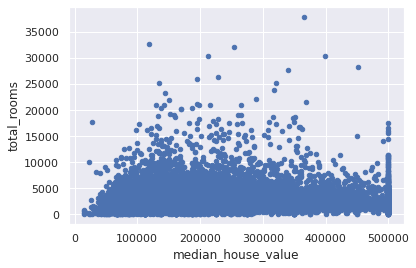

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


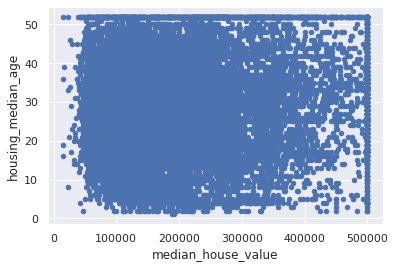

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


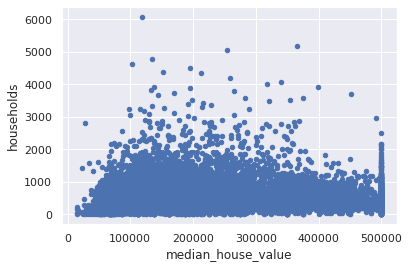

In [ ]:
dataset.plot(kind="scatter", x="median_house_value", y="total_rooms")
plt.show()
dataset.plot(kind="scatter", x="median_house_value", y="housing_median_age")
plt.show()
dataset.plot(kind="scatter", x="median_house_value", y="households")
plt.show()

In [ ]:
print('Korelasi Median House Value dengan Households:', dataset['median_house_value'].corr(dataset['households'],))
print('Korelasi Median House Value dengan Housing Median Age:', dataset['median_house_value'].corr(dataset['housing_median_age']))
print('Korelasi Median House Value dengan Total Rooms:', dataset['median_house_value'].corr(dataset['total_rooms']))

Korelasi Median House Value dengan Households: 0.0610306337890809
Korelasi Median House Value dengan Housing Median Age: 0.10675770707287639
Korelasi Median House Value dengan Total Rooms: 0.13099146625326677


Data Prepocessing


In [ ]:
from sklearn import preprocessing #Data Preprocessing
scaler = preprocessing.StandardScaler()

dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
feature = dataset.drop(['median_house_value'], axis=1)
label = dataset['median_house_value']

feature_scaled = scaler.fit_transform(feature.values)
label_scaled = scaler.fit_transform(dataset['median_house_value'].values.reshape(-1, 1)).flatten()

In [ ]:
print(label.values, '\n')
print(label.values.reshape(-1, 1), '\n')
print(feature.values)

[ 66900.  80100.  85700. ... 103600.  85800.  94600.] 

[[ 66900.]
 [ 80100.]
 [ 85700.]
 ...
 [103600.]
 [ 85800.]
 [ 94600.]] 

[[-114.31     34.19     15.     ... 1015.      472.        1.4936]
 [-114.47     34.4      19.     ... 1129.      463.        1.82  ]
 [-114.56     33.69     17.     ...  333.      117.        1.6509]
 ...
 [-124.3      41.84     17.     ... 1244.      456.        3.0313]
 [-124.3      41.8      19.     ... 1298.      478.        1.9797]
 [-124.35     40.54     52.     ...  806.      270.        3.0147]]


In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.2)

In [ ]:
from sklearn import linear_model #linear regresion
from sklearn.metrics import r2_score, mean_squared_error

linear_reg = linear_model.LinearRegression()
linear_reg.fit(feature_train, label_train)

r2_score(linear_reg.predict(feature_train), label_train)

0.42953093737590464

In [ ]:
from sklearn.model_selection import cross_val_score

cross_validation_score = cross_val_score(linear_reg, feature_train, label_train, cv=10)
reg_score = r2_score(linear_reg.predict(feature_test), label_test)

print(cross_validation_score)
print()
print(reg_score)

[0.63228974 0.62502321 0.65241144 0.64304275 0.62344268 0.62860879
 0.62572911 0.66314277 0.64185952 0.60161548]

0.4723129530591452


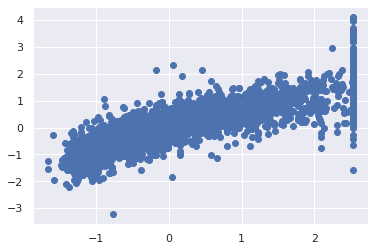

In [ ]:
predictions = linear_reg.predict(feature_test)
plt.scatter(label_test, predictions)

In [ ]:
from sklearn.tree import DecisionTreeRegressor #decision tree
tree_reg = DecisionTreeRegressor()
tree_reg.fit(feature_train, label_train)

print(r2_score(tree_reg.predict(feature_train), label_train))

0.9999999999999633


In [ ]:
tree_score = r2_score(tree_reg.predict(feature_test), label_test)
tree_score

0.6488723441346791

In [ ]:
cross_val_score(tree_reg, feature_train, label_train, cv=10)

array([0.65102144, 0.67976262, 0.6508196 , 0.59771463, 0.62795161,
       0.63068257, 0.63870911, 0.62651248, 0.6402671 , 0.58803411])

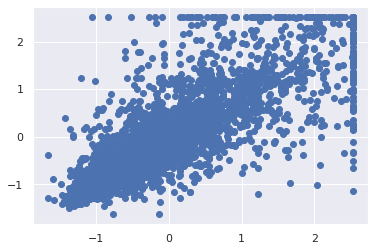

In [ ]:
predictions = tree_reg.predict(feature_test)
plt.scatter(label_test, predictions)

**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor #random forest regressor
forest_reg = RandomForestRegressor()

forest_reg.fit(feature_train, label_train)
print(r2_score(forest_reg.predict(feature_train), label_train))

cross_validation_score = cross_val_score(forest_reg, feature_train, label_train, cv=10)
print(cross_validation_score)

0.9710210885904071
[0.82590381 0.83011891 0.82184587 0.80201237 0.80844274 0.81131217
 0.82752805 0.82761888 0.81029908 0.78452054]


In [ ]:
forest_score_80 = r2_score(forest_reg.predict(feature_test), label_test)
forest_score_80

0.784160427859659

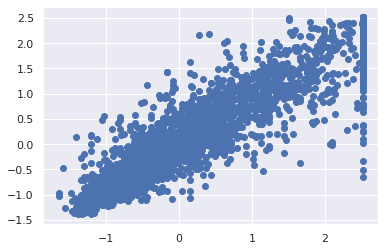

In [ ]:
predictions = forest_reg.predict(feature_test)
plt.scatter(label_test, predictions)

## **NOMOR 2**

---




In [ ]:
from sklearn.model_selection import train_test_split
feature_train_90, feature_test_90, label_train_90, label_test_90 = train_test_split(feature_scaled, label_scaled, test_size=0.1)

In [ ]:
forest_reg.fit(feature_train_90, label_train_90)
print(r2_score(forest_reg.predict(feature_train_90), label_train_90), '\n')

0.9720487044905273 



In [ ]:
forest_score_90 = r2_score(forest_reg.predict(feature_test_90), label_test_90)
forest_score_90

0.7563864555469586

In [ ]:
cross_validation_score_90 = cross_val_score(forest_reg, feature_train_90, label_train_90, cv=10)
print(cross_validation_score_90)

[0.82042892 0.80817735 0.83042263 0.81184647 0.80793145 0.80954868
 0.84207339 0.83925733 0.84035472 0.81136213]


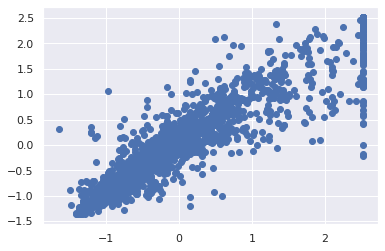

In [ ]:
predictions_90 = forest_reg.predict(feature_test_90)
plt.scatter(label_test_90, predictions_90)

85% training data

In [ ]:
from sklearn.model_selection import train_test_split
feature_train_85, feature_test_85, label_train_85, label_test_85 = train_test_split(feature_scaled, label_scaled, test_size=0.15)

In [ ]:
forest_reg.fit(feature_train_85, label_train_85)
print(r2_score(forest_reg.predict(feature_train_85), label_train_85))

0.9720879543610269


In [ ]:
forest_score_85 = r2_score(forest_reg.predict(feature_test_85), label_test_85)
forest_score_85

0.7468376631382735

In [ ]:
cross_validation_score_85 = cross_val_score(forest_reg, feature_train_85, label_train_85, cv=10)
print(cross_validation_score_85)

[0.82042812 0.80367784 0.82268119 0.80938849 0.83022941 0.80755895
 0.82345919 0.80299872 0.83747163 0.83170484]


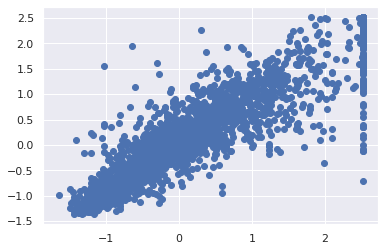

In [ ]:
predictions_85 = forest_reg.predict(feature_test_85)
plt.scatter(label_test_85, predictions_85)

Pembandingan skor r 2

In [ ]:
print(round(forest_score_80, 3))
print(round(forest_score_85, 3))
print(round(forest_score_90, 3))

0.784
0.747
0.756


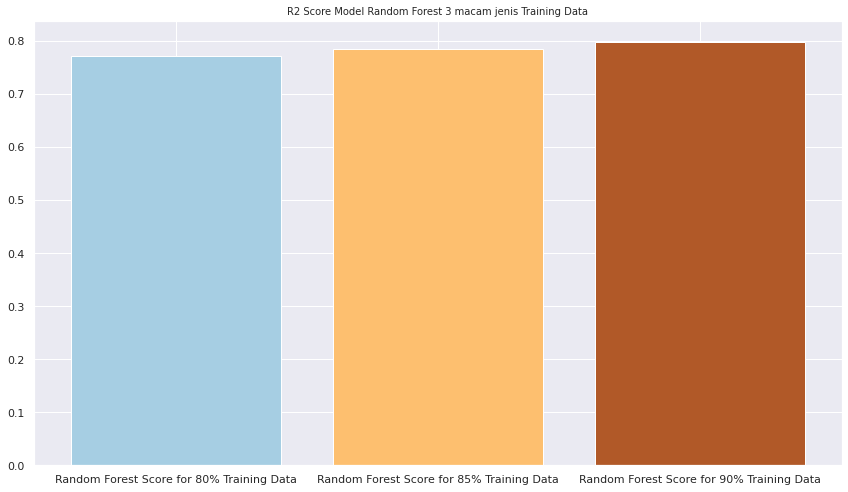

In [ ]:
r2_score = np.array([0.771, 0.785, 0.798])
labels = np.array(['Random Forest Score for 80% Training Data', 'Random Forest Score for 85% Training Data', 'Random Forest Score for 90% Training Data'])
indices = np.argsort(r2_score)
color = plt.cm.Paired(np.linspace(0, 1, 3))

plt.figure(figsize=(12, 7))
plt.bar(range(len(indices)), nilai_r2_score[indices], color=color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('R2 Score Model Random Forest 3 macam jenis Training Data', fontsize=10)
plt.grid('on')
plt.tight_layout()
plt.show()

## **NOMOR 3**

---

In [ ]:
from sklearn.model_selection import train_test_split
feature_train_80, feature_test_80, label_train_80, label_test_80 = train_test_split(feature_scaled, label_scaled, test_size=0.2)

Linear Regression 80% training data

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
linear_reg = LinearRegression()
linear_reg.fit(feature_train_80, label_train_80)

r2_score(linear_reg.predict(feature_train_80), label_train_80)

0.44025085362023864

In [ ]:
linear_score_80 = r2_score(linear_reg.predict(feature_test_80), label_test_80)
linear_score_80

0.4493015081014249

In [ ]:
cross_validation_score_80 = cross_val_score(linear_reg, feature_train_80, label_train_80, cv=10)
print(cross_validation_score_80)

[0.66365716 0.65998572 0.63176097 0.63357917 0.65044897 0.54134071
 0.64113761 0.64818489 0.64991765 0.63180351]


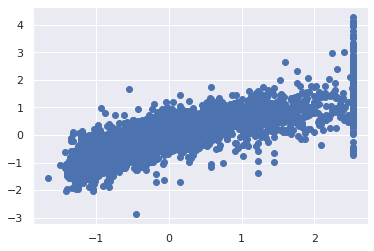

In [ ]:
predictions_80 = linear_reg.predict(feature_test_80)
plt.scatter(label_test_80, predictions_80)

Support Vector Machine Regressor with 80% Training Data

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_reg_rbf = SVR(kernel='rbf')
svr_reg_rbf.fit(feature_train_80, label_train_80)
print(r2_score(svr_reg_rbf.predict(feature_train_80), label_train_80))
print(r2_score(svr_reg_rbf.predict(feature_test_80), label_test_80))

0.6780440148785852
0.677351020575593


In [ ]:
svr_reg_poly = SVR(kernel='poly')
svr_reg_poly.fit(feature_train_80, label_train_80)
print(r2_score(svr_reg_poly.predict(feature_train_80), label_train_80))
print(r2_score(svr_reg_poly.predict(feature_test_80), label_test_80))

0.20762154840844171
0.21978692660516097


In [ ]:
svr_reg_linear = SVR(kernel='linear')
svr_reg_linear.fit(feature_train_80, label_train_80)
print(r2_score(svr_reg_linear.predict(feature_train_80), label_train_80))
print(r2_score(svr_reg_linear.predict(feature_test_80), label_test_80))

0.42730936797730323
0.38654274315533843


In [ ]:
svr_score_80 = r2_score(svr_reg_rbf.predict(feature_test_80), label_test_80) #R2 Score SVR terbaik dengan memakai kernel rbf maka menggunakan kernel rbf utk model utamanya
svr_score_80

0.677351020575593

In [ ]:
cross_validation_score_80 = cross_val_score(svr_reg_rbf, feature_train_80, label_train_80, cv=10)
print(cross_validation_score_80)

[0.77663087 0.78168373 0.75100824 0.74247386 0.76467744 0.70087163
 0.77031999 0.75621604 0.75490853 0.74582921]


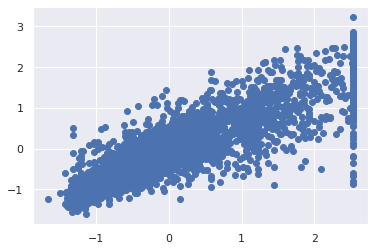

In [ ]:
predictions_80 = svr_reg_rbf.predict(feature_test_80)
plt.scatter(label_test_80, predictions_80)

In [ ]:
print('Hasil R 2 Score untuk Linear Regression dengan 80% Training Data :', round(linear_score_80, 3))
print('Hasil R 2 Score untuk Support Vector Regressor dengan 80% Training Data :', round(svr_score_80, 3))

Hasil R 2 Score untuk Linear Regression dengan 80% Training Data : 0.449
Hasil R 2 Score untuk Support Vector Regressor dengan 80% Training Data : 0.677


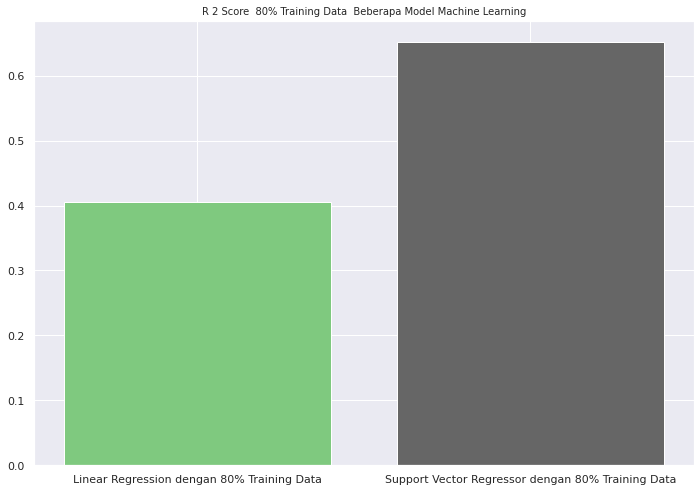

In [ ]:
nilai_r2_score_beda_model = np.array([0.406, 0.652])
labels_model_lain = np.array(['Linear Regression dengan 80% Training Data', 'Support Vector Regressor dengan 80% Training Data'])
indices_model_lain = np.argsort(nilai_r2_score_beda_model)
warna = plt.cm.Accent(np.linspace(0, 1, 2))

plt.figure(figsize=(10, 7))
plt.bar(range(len(indices_model_lain)), nilai_r2_score_beda_model[indices_model_lain], color=warna)
plt.xticks(range(len(indices_model_lain)), labels_model_lain[indices_model_lain])
plt.title('R 2 Score  80% Training Data  Beberapa Model Machine Learning', fontsize=10)
plt.grid('on')
plt.tight_layout()
plt.show()

Assignments
Visualisasikan korelasi feature median_house_value dengan total_rooms, housing_median_age, dan households menggunakan scatter plot.

Lakukan training dengan komposisi berikut:

90% training data & 10% testing
85% training data & 15% testing
Lalu lakukan regression menggunakan RandomForestRegressor. Bandingkan ketika skor r2 yang didapat (90% training, 85% training, 80% training yang sudah dilakukan sebagai contoh diatas).

Tariklah kesimpulan yang didapat setelah membandingkan 3 skor tersebut.

Gunakan DecisionTreeRegressor (from sklearn.tree import DecisionTreeRegressor) dan RandomForestRegressor (from sklearn.ensemble import RandomForestRegressor) untuk melakukan training. Bandingkan hasil r2 score yang didapat dengan LinearRegression. Tariklah kesimpulan yang didapat.